In [ ]:
# Mengevaluasi distribusi kelas dalam variabel target untuk masing-masing dataset. 
# Menentukan apakah dataset memiliki ketidakseimbangan kelas yang signifikan. 
# Mengusulkan metode untuk menangani ketidakseimbangan kelas (SMOTE, class weighting, undersampling/oversampling). 
# Membandingkan hasil prapemrosesan dari kedua dataset dan menentukan dataset mana yang lebih siap untuk proses prediksi. 

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [ ]:
# Membaca dataset
df_tes_end= pd.read_csv("app_test_cleaned_encoded.csv") 
df_tra_end= pd.read_csv("app_train_cleaned_encoded.csv")  

In [ ]:
print(df_tra_end.columns)
df_tra_end.columns = df_tra_end.columns.str.strip()

In [ ]:
print(df_tra_end.head())

In [ ]:
print("Class Distribution in df_tra_end:")
train_class_counts = df_tra_end['TARGET'].value_counts()
train_class_proportions = df_tra_end['TARGET'].value_counts(normalize=True)
print(train_class_counts)
print(train_class_proportions)   

In [ ]:
print(df_tes_end.columns)
df_tes_end.columns = df_tes_end.columns.str.strip()

In [ ]:
print(df_tra_end.head())

In [ ]:
print("Class Distribution in df_tes_end:")
test_class_counts = df_tes_end['REGION_RATING_CLIENT'].value_counts()
test_class_proportions = df_tes_end['REGION_RATING_CLIENT'].value_counts(normalize=True)
print(test_class_counts)
print(test_class_proportions)

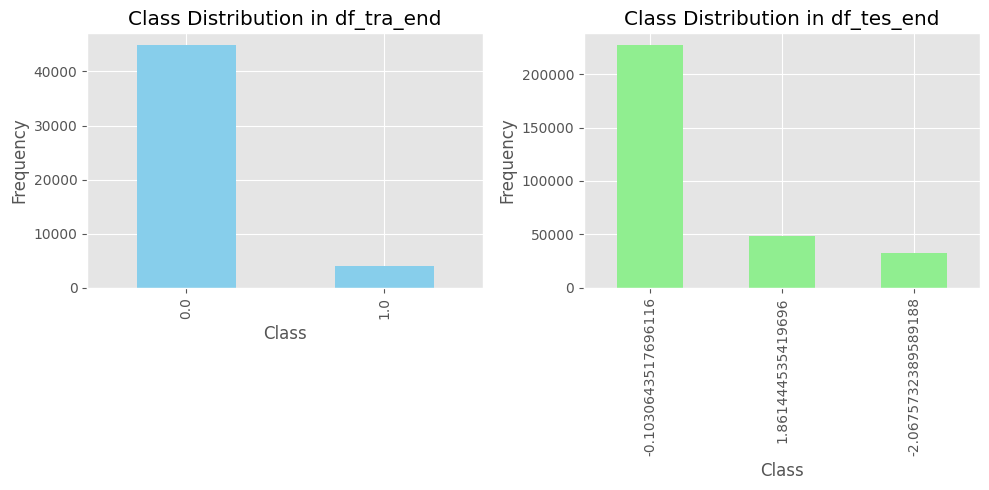

In [40]:

# Plotting the class distribution for df_tra_end
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in df_tra_end')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Plotting the class distribution for df_tes_end
plt.subplot(1, 2, 2)
test_class_counts.plot(kind='bar', color='lightgreen')
plt.title('Class Distribution in df_tes_end')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [42]:
# Menghitung IR
IR = train_class_counts.max() / train_class_counts.min()
print(f"Imbalance Ratio (IR): {IR:.2f}")

Imbalance Ratio (IR): 11.41


In [43]:
# Menghitung IR
IR = test_class_counts.max() / test_class_counts.min()
print(f"Imbalance Ratio (IR): {IR:.2f}")

Imbalance Ratio (IR): 7.05


In [44]:
# Menghitung Shannon Entropy
probs = train_class_counts / train_class_counts.sum()
entropy = -np.sum(probs * np.log2(probs))
print(f"Shannon Entropy: {entropy:.4f}")

Shannon Entropy: 0.4042


In [45]:
# Menghitung Shannon Entropy
probs = test_class_counts / test_class_counts.sum()
entropy = -np.sum(probs * np.log2(probs))
print(f"Shannon Entropy: {entropy:.4f}")

Shannon Entropy: 1.0838


In [48]:
# Assuming df_tra_end is your DataFrame and 'target' is the column of interest
X = df_tra_end.drop('TARGET', axis=1)
y = df_tra_end['TARGET']